In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

In [49]:
# Combine CO2 emission files
file_list = ["../out/emissions_assignment_1",
             "../out/emissions_assignment_2",
             "../out/emissions_assignment_3"]

df_overall = [pd.read_csv(file) for file in file_list]
df_overall = pd.concat(df_overall, ignore_index = True)

#df_overall.to_csv("../out/combined_emissions.csv", index = False)

In [2]:
# Combine subtask-specific emission files

base_file_list = glob.glob(os.path.join("../out/emissions_base_*.csv"))

df = [pd.read_csv(file) for file in base_file_list]
df = pd.concat(df, ignore_index = True)

#df.to_csv("../out/combined_base_emissions.csv", index = False)

df["emissions_rate"] = df["emissions_rate"]*10000

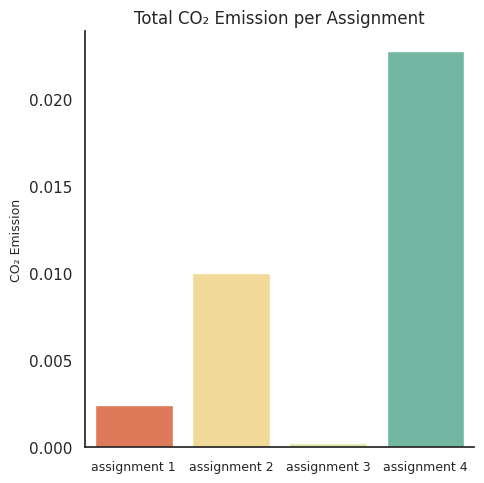

In [138]:
total_emissions_per_project = df.groupby("project_name")["emissions"].sum().reset_index()

sns.set_style("white")

g = sns.catplot(total_emissions_per_project_sorted, x = "project_name", y = "emissions",
                hue = "project_name", kind = "bar", palette = "Spectral")
plt.title("Total CO₂ Emission per Assignment")
g.set_axis_labels("", "CO₂ Emission", fontsize = 9)
g.set_xticklabels(fontsize = 9)
plt.tight_layout()
plt.show()

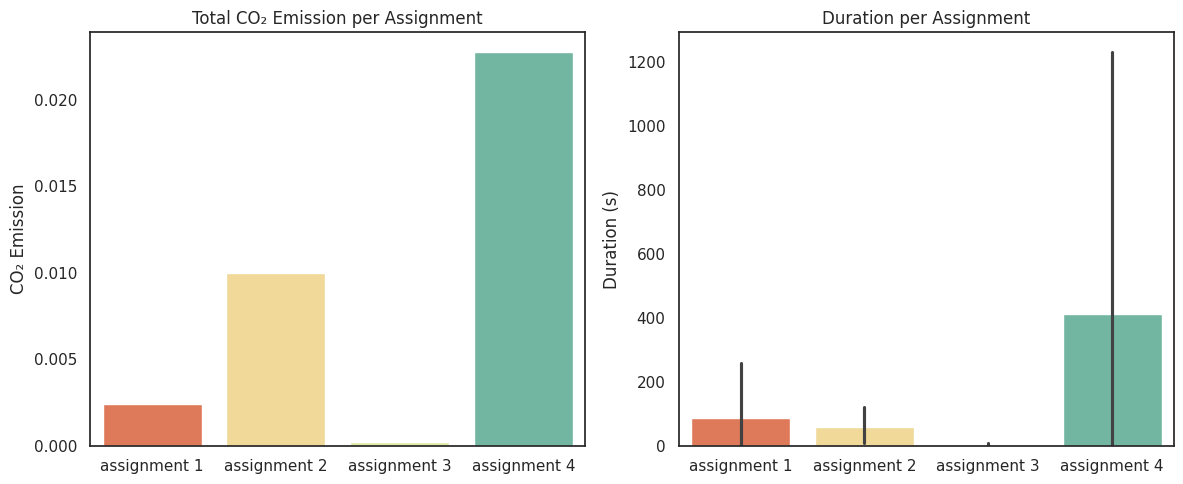

In [148]:
df_sorted = df.sort_values(by="project_name")
total_emissions_per_project_sorted = total_emissions_per_project.sort_values(by="project_name")

sns.set_style("white")
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data = total_emissions_per_project_sorted, x = "project_name", y = "emissions", 
            hue = "project_name", palette = "Spectral")
plt.title("Total CO₂ Emission per Assignment")
plt.xlabel("")
plt.ylabel("CO₂ Emission")

plt.subplot(1, 2, 2)
sns.barplot(data = df_sorted, x = "project_name", y = "duration",
            hue = "project_name", palette = "Spectral")
plt.title("Duration per Assignment")
plt.xlabel("")
plt.ylabel("Duration (s)")

plt.tight_layout()
plt.show()

/tmp/ipykernel_23394/1610764067.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_emissions_per_project_sorted, x="project_name", y="emissions", palette="Spectral")
/tmp/ipykernel_23394/1610764067.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="project_name", y="duration", palette="Spectral")


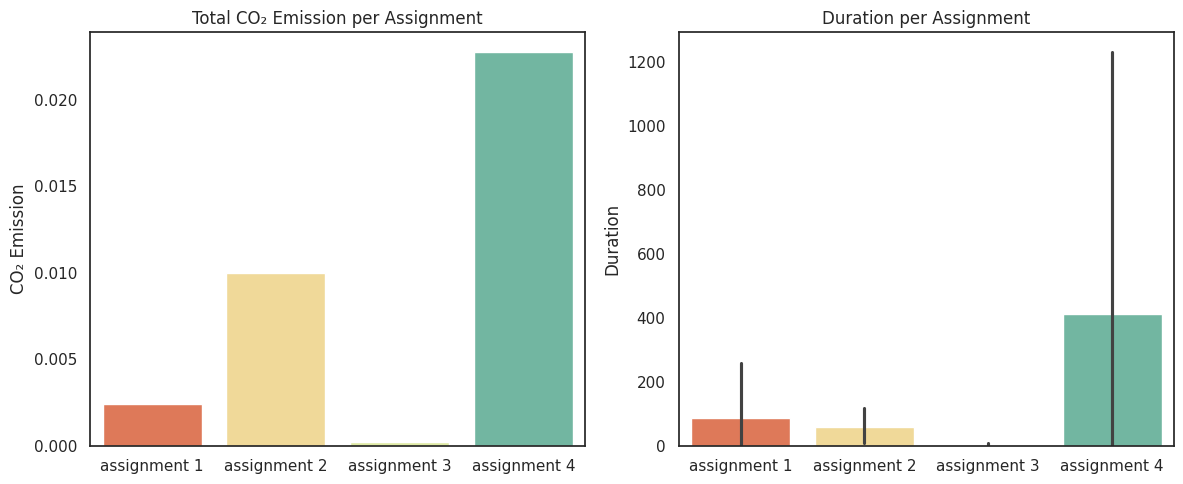

In [134]:

# Create the second subplot for duration
plt.subplot(1, 2, 2)
sns.barplot(data=df_sorted, x="project_name", y="duration", palette="Spectral")
plt.title("Duration per Assignment")
plt.xlabel("")
plt.ylabel("Duration")

plt.tight_layout()
plt.show()


- Data wrangling is the process of converting raw data into a usable form (such as loading, cleaning and splitting)
- Data processing involves transforming raw data into useful information (such as calculating %)


In [3]:
task_groups = {
    'load spacy model': 'Load Model',
    'load data, process text, and save results': 'Data Wrangling',
    'plot results': 'Plotting',
    'Load and split data': 'Data Wrangling',
    'Define vectorizer': 'Feature Extraction',
    'Fit vectorizer': 'Feature Extraction',
    'Load vectorized data': 'Data Wrangling',
    'Define classifier': 'Model Definition',
    'GridSearch': 'Hyperparameter Tuning',
    'Fit classifier': 'Model Training',
    'Evaluate classifier': 'Model Evaluation',
    'Plot loss curve': 'Plotting',
    'Permutation test': 'Model Evaluation',
    'Shap': 'Model Interpretation',
    'load and clean data': 'Data Wrangling',
    'load model': 'Load Model',
    'expand query': 'Data Processing',
    'calculate percentage': 'Data Processing',
    'save results': 'Saving Results',
    'visualise query': 'Plotting',
    'load classifier': 'Load Model',
    'predict emotion': 'Model Prediction',
    'reshape data': 'Data Wrangling',
    'plot season': 'Plotting',
    'plot emotion': 'Plotting',
}

In [104]:
# Map each 'task_name' to predefined task group
df["task_group"] = df["task_name"].map(task_groups)

# Calculate total emissions for each project
df["total_emissions"] = df.groupby("project_name")["emissions"].transform("sum")

# Calculate percentage contribution of each task group within each project
df["emission_percentage"] = df["emissions"] / df["total_emissions"] * 100

# Reshapes the data for plotting (one row for each assignment with 'task_group' as columns with 'emission_percentage')
pivot_df = df.pivot_table(index = "project_name", columns = "task_group", values = "emission_percentage",
                            aggfunc = "sum", fill_value = 0)


/tmp/ipykernel_23394/2040111531.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize = 9)


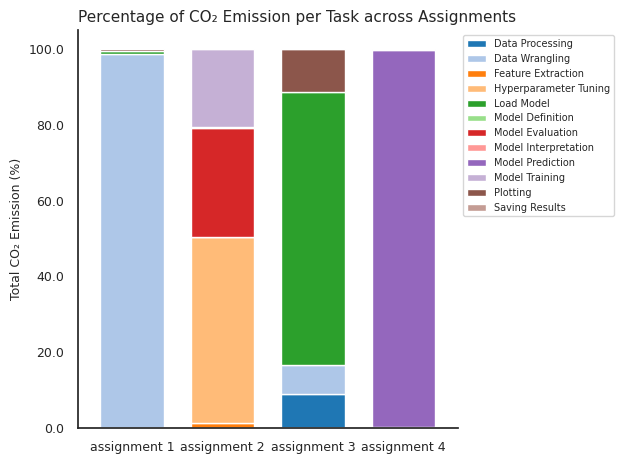

In [105]:
sns.set_style("white")

ax = pivot_df.plot(kind = 'bar', stacked = True, color = sns.color_palette("tab20", n_colors = 12), width = 0.7)

ax.set_title("Percentage of CO₂ Emission per Task across Assignments", fontsize = 11, loc = "left")
ax.set_ylabel("Total CO₂ Emission (%)", fontsize = 9)

legend = ax.legend(bbox_to_anchor=(1, 1), loc = "upper left", fontsize = 7)
legend.get_frame().set_linewidth(1)

ax.set_xlabel("")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "center", fontsize = 9)
ax.set_yticklabels(ax.get_yticks(), fontsize = 9)

sns.despine()
plt.tight_layout()
plt.show()


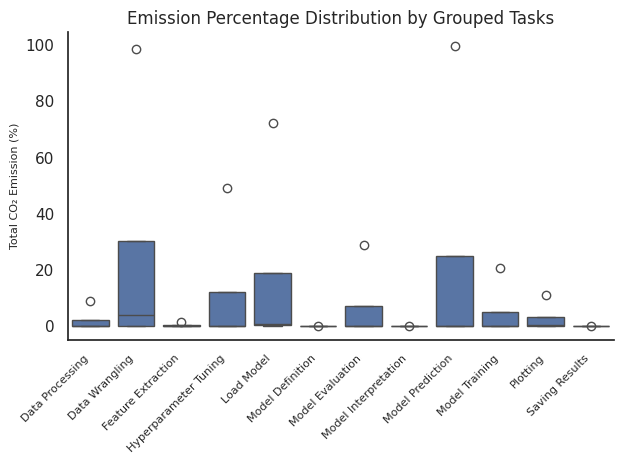

In [117]:
# Box plot to show the emission rate for the different task groups:

df_melted = pivot_df.reset_index().melt(id_vars = "project_name", var_name = "task_group", value_name = "emission_percentage")

sns.boxplot(x = "task_group", y = "emission_percentage", data = df_melted)
plt.title("Emission Percentage Distribution by Grouped Tasks", fontsize = 12)
plt.xlabel("")

plt.ylabel("Total CO₂ Emission (%)", fontsize = 8)
plt.xticks(rotation = 45, ha = "right", fontsize = 8)

sns.despine()
plt.tight_layout()
plt.show()
